In [1]:
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
import seaborn as sns

### Create a Graph from scratch

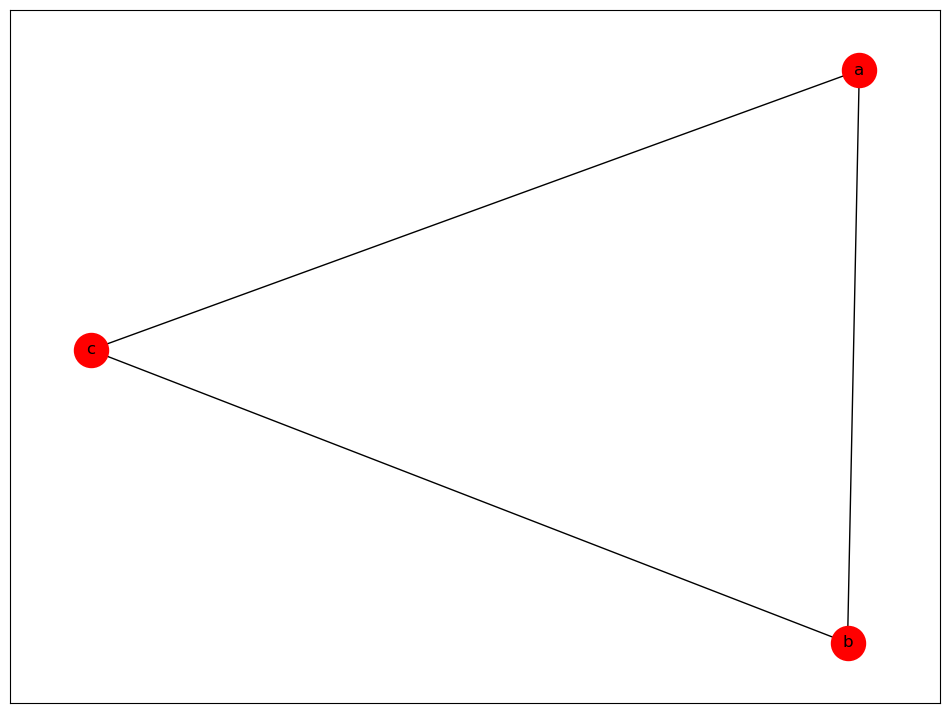

In [4]:
# Create a blank graph
g = nx.Graph()

# Insert an edge into the graph; nodes will be inserted automatically
g.add_edge('a', 'b')
g.add_edge('b', 'c')
g.add_edge('c', 'a')

# Draw the graph
fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(g,  ax=ax, node_size=600, node_color='red')

In [5]:
# Nodes
g.nodes()

NodeView(('a', 'b', 'c'))

In [6]:
# Edges
g.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c')])

In [7]:
# A graph data structure in NetworkX is just like a Python dict
g.nodes['a']

g.nodes['a']['size'] = 1
g.nodes['a']

{}

{'size': 1}

In [8]:
# Nodes and edges can store arbitrary dicts of attributes, and any other type of rich data
g['a']

AtlasView({'b': {}, 'c': {}})

In [9]:
# Returns the attributes of the edge A -> B
g['a']['b']

{}

In [10]:
# sets an attribute of the edge
g['a']['b']['weight'] = 1 

g['a']['b']

{'weight': 1}

**Many of the metrics also return a dict, with node IDs as keys and metrics as values.**

## It’s dicts all the way down!

In [11]:
def read_lj_friends(g, name):
    # fetch the friend-list from LiveJournal
    response = requests.get(f"http://www.livejournal.com/misc/fdata.bml?user={name}")

    # walk through the lines in the response and add each one as an edge in a network
    for line in response.text.split("\n"):
        #Comments in the response start with a '#'
        if line.startswith('#'): continue

        # the format is "< name" (incoming) or "> name" (outgoing)
        #make sure that we don't have an empty line
        parts = line.split()
        if len(parts) == 0: 
            continue

        #add the edge to the network
        if parts[0] == '<':
            g.add_edge(parts[1], name)
        else:
            g.add_edge(name, parts[1])

299

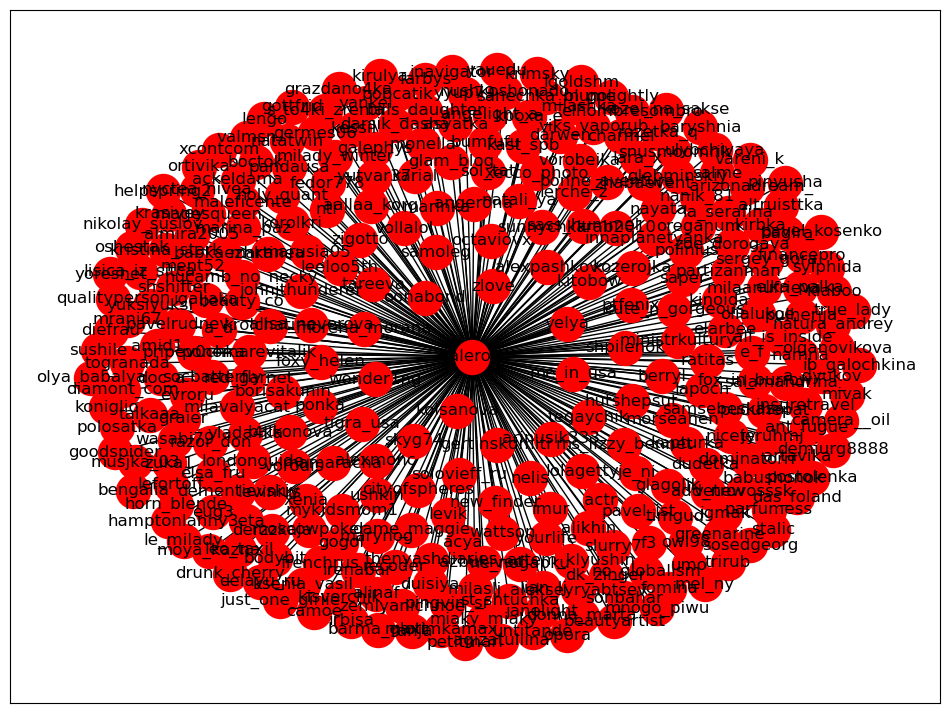

In [12]:
g = nx.Graph()
read_lj_friends(g, 'valerois')
len(g)

fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(g,  ax=ax, node_size=600, node_color='red')

In [13]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=None):
    """
    Start with a central node
    Obtain friends of the central node
    For every one of the friends:
       sample friends of the friends
       For every friend-of-friend
           sample friends-of-friends-of-friends...
    etc...
    
    """
    if taboo_list is None:
        taboo_list = []
        
    print(center, current_depth, max_depth, taboo_list)
    if current_depth == max_depth:
        # if we have reached the depth limit of the search, return.
        print('out of depth')
        return taboo_list
    if center in taboo_list:
        #we've been here before -- return right away
        return taboo_list
    else:
        # we shall never return to the same node
        taboo_list.append(center) 

    # call LiveJournal API and get data for a node.
    read_lj_friends(g, center) 

    for node in g.neighbors(center):
        # Iterate through all friends of the central node, call snowball_sampling recursively
        taboo_list = snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list)
    
    return taboo_list

In [14]:
g = nx.Graph()
snowball_sampling(g, 'kozel_na_sakse')

nx.write_pajek(g, 'lj_friends.net')

kozel_na_sakse 0 1 []
cr 1 1 ['kozel_na_sakse']
out of depth
saper 1 1 ['kozel_na_sakse']
out of depth
ptfenix 1 1 ['kozel_na_sakse']
out of depth
guy_gomel 1 1 ['kozel_na_sakse']
out of depth
klari 1 1 ['kozel_na_sakse']
out of depth
dachte 1 1 ['kozel_na_sakse']
out of depth
solo_oboroten 1 1 ['kozel_na_sakse']
out of depth
zina_korzina 1 1 ['kozel_na_sakse']
out of depth
kirulya 1 1 ['kozel_na_sakse']
out of depth
letchikleha 1 1 ['kozel_na_sakse']
out of depth
usolt 1 1 ['kozel_na_sakse']
out of depth
jolita 1 1 ['kozel_na_sakse']
out of depth
periskop 1 1 ['kozel_na_sakse']
out of depth
valerois 1 1 ['kozel_na_sakse']
out of depth
to_to_i_ono_to 1 1 ['kozel_na_sakse']
out of depth
cheese_people 1 1 ['kozel_na_sakse']
out of depth
olga_mama 1 1 ['kozel_na_sakse']
out of depth
gde_moi_mozgi 1 1 ['kozel_na_sakse']
out of depth
tanyakotova 1 1 ['kozel_na_sakse']
out of depth
sovarh 1 1 ['kozel_na_sakse']
out of depth
oshestak 1 1 ['kozel_na_sakse']
out of depth
nikitosbro 1 1 ['kozel_

['kozel_na_sakse']

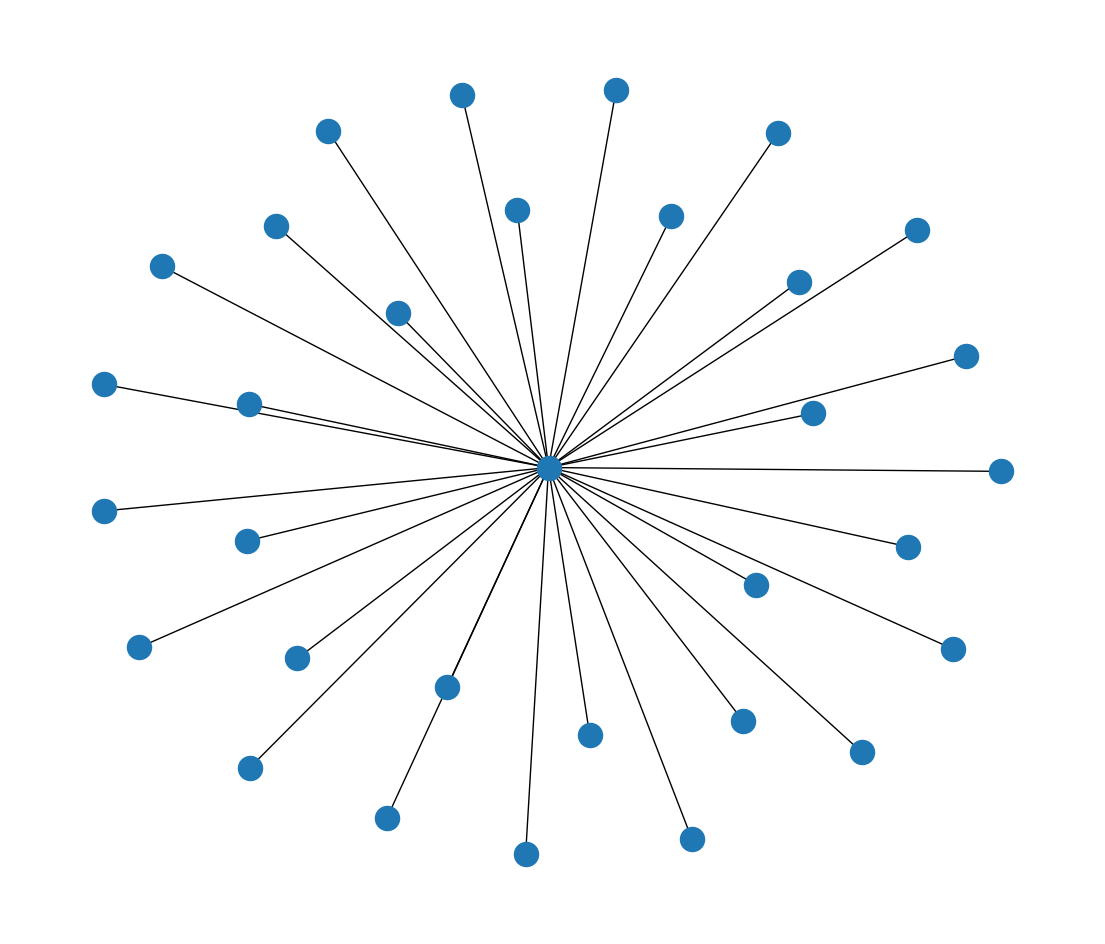

In [15]:
fig, ax = plt.subplots(figsize=(14, 12))
nx.draw(g, ax=ax)

## Centrality Measures

A node degree is simply the number of connections that a node has. On Twitter, it’s the number of followers; on Facebook, it’s the number of friends; and on Reddit, it could be interpreted as the number of upvotes (“link karma”).

### Degree centrality in the LiveJournal network

In [ ]:
g = nx.read_pajek('./chapter3/russians.net')
len(g)

In [ ]:
# compute degree
deg = g.degree

print(f"valerois degree = {deg['valerois']}")

In [ ]:
d = dict(deg)

print(f"Minimum degree {min(d.values())}")
print(f"Maximum degree {max(d.values())}")

In [ ]:
### This function returns a sorted degree list -- useful for celebrity-spotting
def sorted_map(dd: dict) -> dict:
    """
    Sorts dict by its values (desc)
    
    :param dd: dictionary with numeric values
    :return sorted dictionary ordered by its numeric value
    """
    sorted_dict = sorted(dd.items(), key=lambda x: (-x[1], x[0]))
    return sorted_dict

In [ ]:
# get all the nodes sorted by highest degree
ds = sorted_map(d)

# let's see top 10
ds[:9]

In [ ]:
fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(18, 8))

# display a histogram of node degrees in 100 bins
h = ax[0].hist(d.values(), 100)

# plot the same histogram in Log-Log space
ax[1].loglog(h[1][1:], h[0])

### Closeness Centrality - The Gossipmongers

Let's trim the nodes that don't have many connections

In [ ]:
def trim_degrees(g: nx.Graph, degree: int=1) -> nx.Graph:
    """
    Return a new graph object that contains the network with pendant and isolated nodes removed
    
    :param g: Graph
    :param degree: 
    """
    g2 = g.copy()
    d = g2.degree
    for n in g.nodes():
        if d[n] <= degree: 
            g2.remove_node(n)
            
    return g2

In [ ]:
core = trim_degrees(g)
print(f"Number of nodes in Graph with 1 or more connections/degrees = {len(core):,}")

core2 = trim_degrees(g, degree=2)
print(f"Number of nodes in Graph with 2 or more connections/degrees = {len(core2):,}")

core3 = trim_degrees(g, degree=3)
print(f"Number of nodes in Graph with 3 or more connections/degrees = {len(core3):,}")

core10 = trim_degrees(g, degree=10)
print(f"Number of nodse in Graph with 10 or more connections/degrees = {len(core10):,}")

### Let's plot the last trimmed graph

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx(core10,  ax=ax, node_size=600, node_color='red')

### We use the core graph because calculations on the entire 81,000-node graph can take over an hour

In [ ]:
c = nx.closeness_centrality(core10)

In [ ]:
# Sort the results using a function from previous section
cs = sorted_map(c)

# top 10 gossipers
cs[:10]

### Display a histogram of closeness centrality

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
h = ax.hist(c.values(), 100)

### Find the Communication Bottlenecks and/or Community Bridges

Let's build a "bow" graph from a pandas DataFrame

In [ ]:
df_graph = pd.DataFrame({
    'source':['D', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'B', 'G', 'G', 'E'],
    'target':['A', 'B', 'C', 'E', 'F', 'G', 'B', 'C', 'C', 'F', 'E', 'F'],
})
df_graph

In [ ]:
bow = nx.from_pandas_edgelist(df_graph, source='source', target='target', create_using=nx.Graph)
fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(bow,  ax=ax, node_size=600, node_color='red')

In [ ]:
# Calculate betweenes centrality
nx.betweenness_centrality(bow)

### Compute betweeness centrality in our reduced network

In [ ]:
b = nx.betweenness_centrality(nx.Graph(core10))
bs = sorted_map(b)
bs[:10]

|Metric |Degree|

### Make a list of the elite group by merging top ten groups for 3 centrality metrics

|Metric      |Low Degree |Low Closeness |Low Betweenness |
|------------|-----------|--------------|----------------|      
|High Degree |           |Ego is embedded in a cluster that is far from the rest of the network|Ego’s connections are redundant-the world passes him by|
|High Closeness|Key player tied to important or active others| |Ego is in a dense, active cluster at the center of events—with many others|

In [ ]:
top10_names_dc = [x[0] for x in ds[:10]]
top10_names_cc = [x[0] for x in cs[:10]]
top10_names_bc = [x[0] for x in bs[:10]]

In [ ]:
## use Python sets to compute a union of the sets
names = list(set(top10_names_dc) | set(top10_names_cc) | set (top10_names_bc))

## build a table with centralities
table = pd.DataFrame(
    {
        "Name": names,
        "Degree": [d[name] for name in names],
        "Closeness": [c[name] for name in names],
        "Betweenness": [b[name] for name in names]
    }, columns=["Name", "Degree", "Closeness", "Betweenness"]
)
table

### Who Is a “Gray Cardinal?”

In [ ]:
ec_numpy = nx.eigenvector_centrality_numpy(g)
sorted_map(ec_numpy)[:10]

In [ ]:
ec = nx.eigenvector_centrality(nx.Graph(g))
sorted_map(ec)[:10]

In [ ]:
ec_numpy['valerois']

### PageRank—How Google Measures Centrality

In [ ]:
sorted_map(nx.pagerank(g))[:10]

In [ ]:
sorted_map(nx.pagerank(nx.Graph(g)))[:10]